[06/07/23 09:58:14] INFO     Saving cached data to C:\Users\avery\soccerdata\data\FBref               ]8;id=240908;file://C:\Users\avery\anaconda3\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=558162;file://C:\Users\avery\anaconda3\lib\site-packages\soccerdata\_common.py#89\89]8;;\

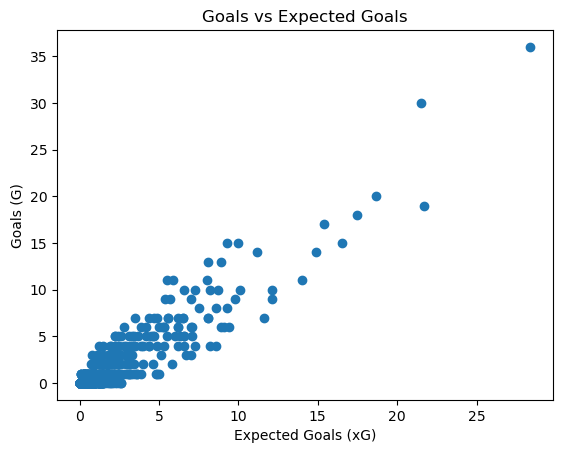

In [49]:

import matplotlib.pyplot as plt
import pandas as pd
import soccerdata as sd

# Get players
fbref = sd.FBref(leagues="ENG-Premier League", seasons=2022)
player_season_stats = fbref.read_player_season_stats(stat_type="standard")



# Convert columns to numeric data types
player_season_stats[('Performance', 'Gls')] = pd.to_numeric(player_season_stats[('Performance', 'Gls')])
player_season_stats[('Expected', 'xG')] = pd.to_numeric(player_season_stats[('Expected', 'xG')])

# Create a scatter plot of goals vs expected goals
plt.scatter(player_season_stats[('Expected', 'xG')], player_season_stats[('Performance', 'Gls')])

# Set plot title and axis labels
plt.title('Goals vs Expected Goals')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals (G)')

# Show the plot
plt.show()


